<a href="https://colab.research.google.com/github/bishab/Nepali_Number_Plate_Recognition/blob/master/Nepali_Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!nvidia-smi

Tue Sep 22 15:05:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |   2661MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Connect drive

In [28]:
!ls /content/drive/My\ Drive/keras/


'Number plate'


In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Code

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


In [31]:
data_generator=ImageDataGenerator(rescale=1.0/255,validation_split=0.3)
train_gen=data_generator.flow_from_directory(directory='/content/drive/My Drive/keras/Number plate/images',target_size=(128,128),subset='training')
valid_gen=data_generator.flow_from_directory(directory='/content/drive/My Drive/keras/Number plate/images',target_size=(128,128),subset='validation')

Found 1430 images belonging to 12 classes.
Found 603 images belonging to 12 classes.


In [37]:
model=Sequential()
model.add(Conv2D(50,3,activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(Conv2D(80,3,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(Conv2D(80,3,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(12,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 50)      1400      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 50)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 63, 63, 50)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 80)        36080     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 80)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 80)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 80)       

In [38]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [39]:
hist=model.fit_generator(train_data,validation_data=valid_gen,epochs=20)

Epoch 1/20
64/64 [==============================] - 7s 102ms/step - loss: 2.5636 - accuracy: 0.1776 - val_loss: 1.6322 - val_accuracy: 0.5804
Epoch 2/20
64/64 [==============================] - 6s 96ms/step - loss: 1.2862 - accuracy: 0.6222 - val_loss: 1.0180 - val_accuracy: 0.7380
Epoch 3/20
64/64 [==============================] - 6s 96ms/step - loss: 0.9657 - accuracy: 0.7290 - val_loss: 0.7525 - val_accuracy: 0.7910
Epoch 4/20
64/64 [==============================] - 6s 98ms/step - loss: 0.8151 - accuracy: 0.7683 - val_loss: 0.6450 - val_accuracy: 0.8060
Epoch 5/20
64/64 [==============================] - 6s 95ms/step - loss: 0.7136 - accuracy: 0.7860 - val_loss: 0.5608 - val_accuracy: 0.8358
Epoch 6/20
64/64 [==============================] - 6s 95ms/step - loss: 0.5799 - accuracy: 0.8244 - val_loss: 0.4293 - val_accuracy: 0.8823
Epoch 7/20
64/64 [==============================] - 6s 99ms/step - loss: 0.4924 - accuracy: 0.8500 - val_loss: 0.3820 - val_accuracy: 0.8939
Epoch 8/20
6

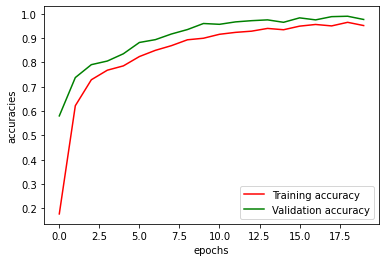

In [56]:
plt.plot(hist.history['accuracy'],'r-')
plt.plot(hist.history['val_accuracy'],'g-')
plt.xlabel('epochs')
plt.ylabel('accuracies')
plt.legend(['Training accuracy','Validation accuracy'])

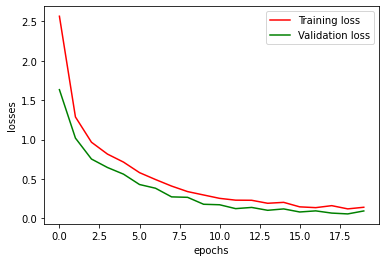

In [53]:
plt.plot(hist.history['loss'],'r-')
plt.plot(hist.history['val_loss'],'g-')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['Training loss','Validation loss'])

In [126]:
x,y_true=next(valid_gen) #this gives the next iteration( values) from the valid_gen 
y_pred=y_true.argmax(axis=-1) #argmax shows the position of the greatest value 

In [194]:
print(y_pred[:10])
print()
print(y_true.argmax(axis=1)[:10])

#exact same output!

[10  2 10  3  6 10  7  3  2  2]

[10  2 10  3  6 10  7  3  2  2]


more about argmax...<br>
Argmax means that the index that will be returned by argmax will be taken from the last axis.

Your data has some shape (19,19,5,80). This means:

Axis 0 = 19 elements
Axis 1 = 19 elements
Axis 2 = 5 elements
Axis 3 = 80 elements
Now, negative numbers work exactly like in python lists, in numpy arrays, etc. Negative numbers represent the inverse order:

Axis -1 = 80 elements
Axis -2 = 5 elements
Axis -3 = 19 elements
Axis -4 = 19 elements

Text(0.5, 1.0, 'Original: 6   Predicted: 6 ')

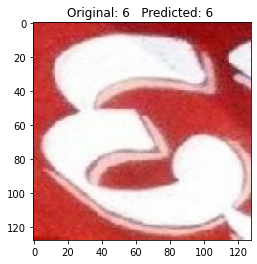

In [187]:
q=keras.preprocessing.image.array_to_img(x[4])
plt.imshow(q)
plt.title('Original: {}   Predicted: {} '.format(y_true[4].argmax(axis=-1),y_pred[4]))

Text(0.5, 1.0, 'Original: 3   Predicted: 3 ')

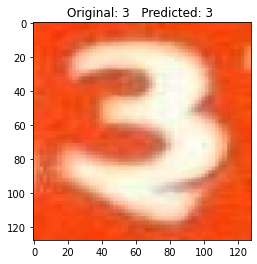

In [188]:

q2=keras.preprocessing.image.array_to_img(x[3])
plt.imshow(q2)
plt.title('Original: {}   Predicted: {} '.format(y_true[3].argmax(axis=-1),y_pred[3]))